# Prédiction des annulations de réservation dans le secteur hôtelier


Un nombre important de réservations d'hôtel sont annulées en raison d'annulations ou de non-présentations. Les raisons typiques de ces annulations sont les changements de plans, les conflits d'horaires, etc. Ces annulations sont souvent facilitées par la possibilité d'annuler gratuitement ou, de préférence, à faible coût, ce qui est bénéfique pour les clients de l'hôtel, mais constitue un facteur moins souhaitable et susceptible de réduire les revenus de l'hôtel. Ces pertes sont particulièrement élevées pour les annulations de dernière minute.

Les nouvelles technologies impliquant des canaux de réservation en ligne ont radicalement changé les possibilités de réservation et le comportement des clients. Cela ajoute une dimension supplémentaire au défi de la gestion des annulations par les hôtels, qui ne sont plus limitées aux caractéristiques traditionnelles des réservations et des clients.

L'annulation de réservations a un impact sur l'hôtel sur plusieurs fronts :

Perte de ressources (chiffre d'affaires) lorsque l'hôtel ne peut pas revendre la chambre.
Coûts supplémentaires des canaux de distribution en augmentant les commissions ou en payant pour la publicité afin d'aider à vendre ces chambres.
Baisse des prix à la dernière minute, afin que l'hôtel puisse revendre une chambre, ce qui entraîne une réduction de la marge bénéficiaire.
Les ressources humaines pour prendre les dispositions nécessaires pour les clients.
Objectif

Le nombre croissant d'annulations nécessite une solution basée sur l'apprentissage automatique (Machine Learning) qui peut aider à prédire quelle réservation est susceptible d'être annulée. Le groupe INN Hotels possède une chaîne d'hôtels au Portugal. Il est confronté à des problèmes liés au nombre élevé d'annulations de réservations et a fait appel à votre entreprise pour obtenir des solutions basées sur les données. En tant que data scientist, vous devez analyser les données fournies pour déterminer les facteurs qui ont une grande influence sur les annulations de réservation, construire un modèle prédictif qui peut prédire quelle réservation sera annulée à l'avance, et aider à formuler des politiques rentables pour les annulations et les remboursements.

Description des données

Les données contiennent les différents attributs des détails de réservation des clients. Le dictionnaire de données détaillé est donné ci-dessous.

Dictionnaire de données

Booking_ID : identifiant unique de chaque réservation
no_of_adults : Nombre d'adultes
no_of_children : Nombre d'enfants
no_of_weekend_nights : Nombre de nuits de week-end (samedi ou dimanche) que le client a passées ou réservées à l'hôtel
no_of_week_nights : Nombre de nuits en semaine (du lundi au vendredi) pendant lesquelles le client a séjourné ou réservé son séjour à l'hôtel.
type_of_meal_plan : Type de plan de repas réservé par le client :
Non sélectionné - Aucun plan de repas n'a été sélectionné
Plan de repas 1 - Petit-déjeuner
Plan de repas 2 - Demi-pension (petit-déjeuner et un autre repas)
Plan de repas 3 - Pension complète (petit-déjeuner, déjeuner et dîner)
required_car_parking_space : Le client a-t-il besoin d'une place de parking ? (0 - Non, 1- Oui)
room_type_reserved : Type de chambre réservée par le client. Les valeurs sont chiffrées (encodées) par INN Hotels.
lead_time : Nombre de jours entre la date de réservation et la date d'arrivée.
arrival_year : Année de la date d'arrivée
arrival_month : Mois de la date d'arrivée
arrival_date : Date du mois
market_segment_type : Désignation du segment de marché.
repeated_guest : Le client est-il un habitué ? (0 - Non, 1- Oui)
no_of_previous_cancellations : Nombre de réservations précédentes qui ont été annulées par le client avant la réservation actuelle.
no_of_previous_bookings_not_canceled : Nombre de réservations précédentes qui n'ont pas été annulées par le client avant la réservation en cours.
avg_price_per_room : Prix moyen par jour de la réservation ; les prix des chambres sont dynamiques. (en euros)
no_of_special_requests : Nombre total de demandes spéciales formulées par le client (par exemple, étage élevé, vue de la chambre, etc.)
booking_status : Indicateur indiquant si la réservation a été annulée ou non.

## Sommaire
- Partie 1 : [Importation des librairies et données](#importation)
- Partie 2 : [Visualisation](#donnee)
- Partie 3 : [Exploratory Data Analysis (EDA)](#exploration)
- Partie 4 : [Preprocessing](#preprocessing)
- Partie 5 : [Initialisation des modèles](#modelisation)
- Partie 5 : [Fine-tuning des hyperparamètres](#finetuning)

## 1.Importation des librairies et données <a id="importation"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import math
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import log_loss
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, average_precision_score, precision_recall_curve, classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df0 = pd.read_csv("INNHotelsGroup.csv")
df = df0.copy(deep =True)

## 2. Visualisation <a id="donnee"></a>

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Conversion des colonnes en types de données appropriés

In [5]:
df["arrival_year"] = df["arrival_year"].astype(str)
df["arrival_month"] = df["arrival_month"].astype(str)
df["repeated_guest"] = df["repeated_guest"].astype(str)

In [6]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
print("Nombre d'observation :", str(df.shape[0]),'\nNombre de variable :', str(df.shape[1]))

Nombre d'observation : 36275 
Nombre de variable : 19


## 3. Exploratory Data Analysis (EDA)<a id="exploration"></a>

### 3.1. Distribution variable cible

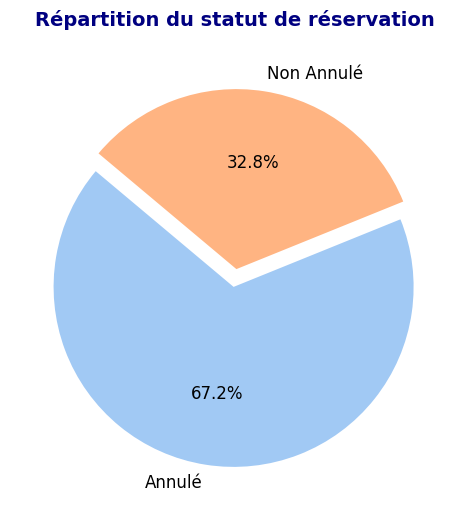

In [8]:
labels = ["Annulé", "Non Annulé"]
counts = df['booking_status'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"), explode=[0.05, 0.05], textprops={'fontsize': 12})
ax.set_title("Répartition du statut de réservation", fontsize=14, fontweight='bold', color='navy', pad=20)
plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1)
plt.show()

### 3.2. Statistiques descriptives univariées

#### 3.2.1. Statistiques descriptives des variables numériques

In [9]:
var_num = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nRésumé des statistiques pour les colonnes numériques :")
display(df[var_num].describe().T)


Résumé des statistiques pour les colonnes numériques :


,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
no_of_previous_cancellations,36275.0,0.023349,0.368331,0.0,0.0,0.00,0.0,13.0
no_of_previous_bookings_not_canceled,36275.0,0.153411,1.754171,0.0,0.0,0.00,0.0,58.0
avg_price_per_room,36275.0,103.423539,35.089424,0.0,80.3,99.45,120.0,540.0


#### Visualisations graphiques

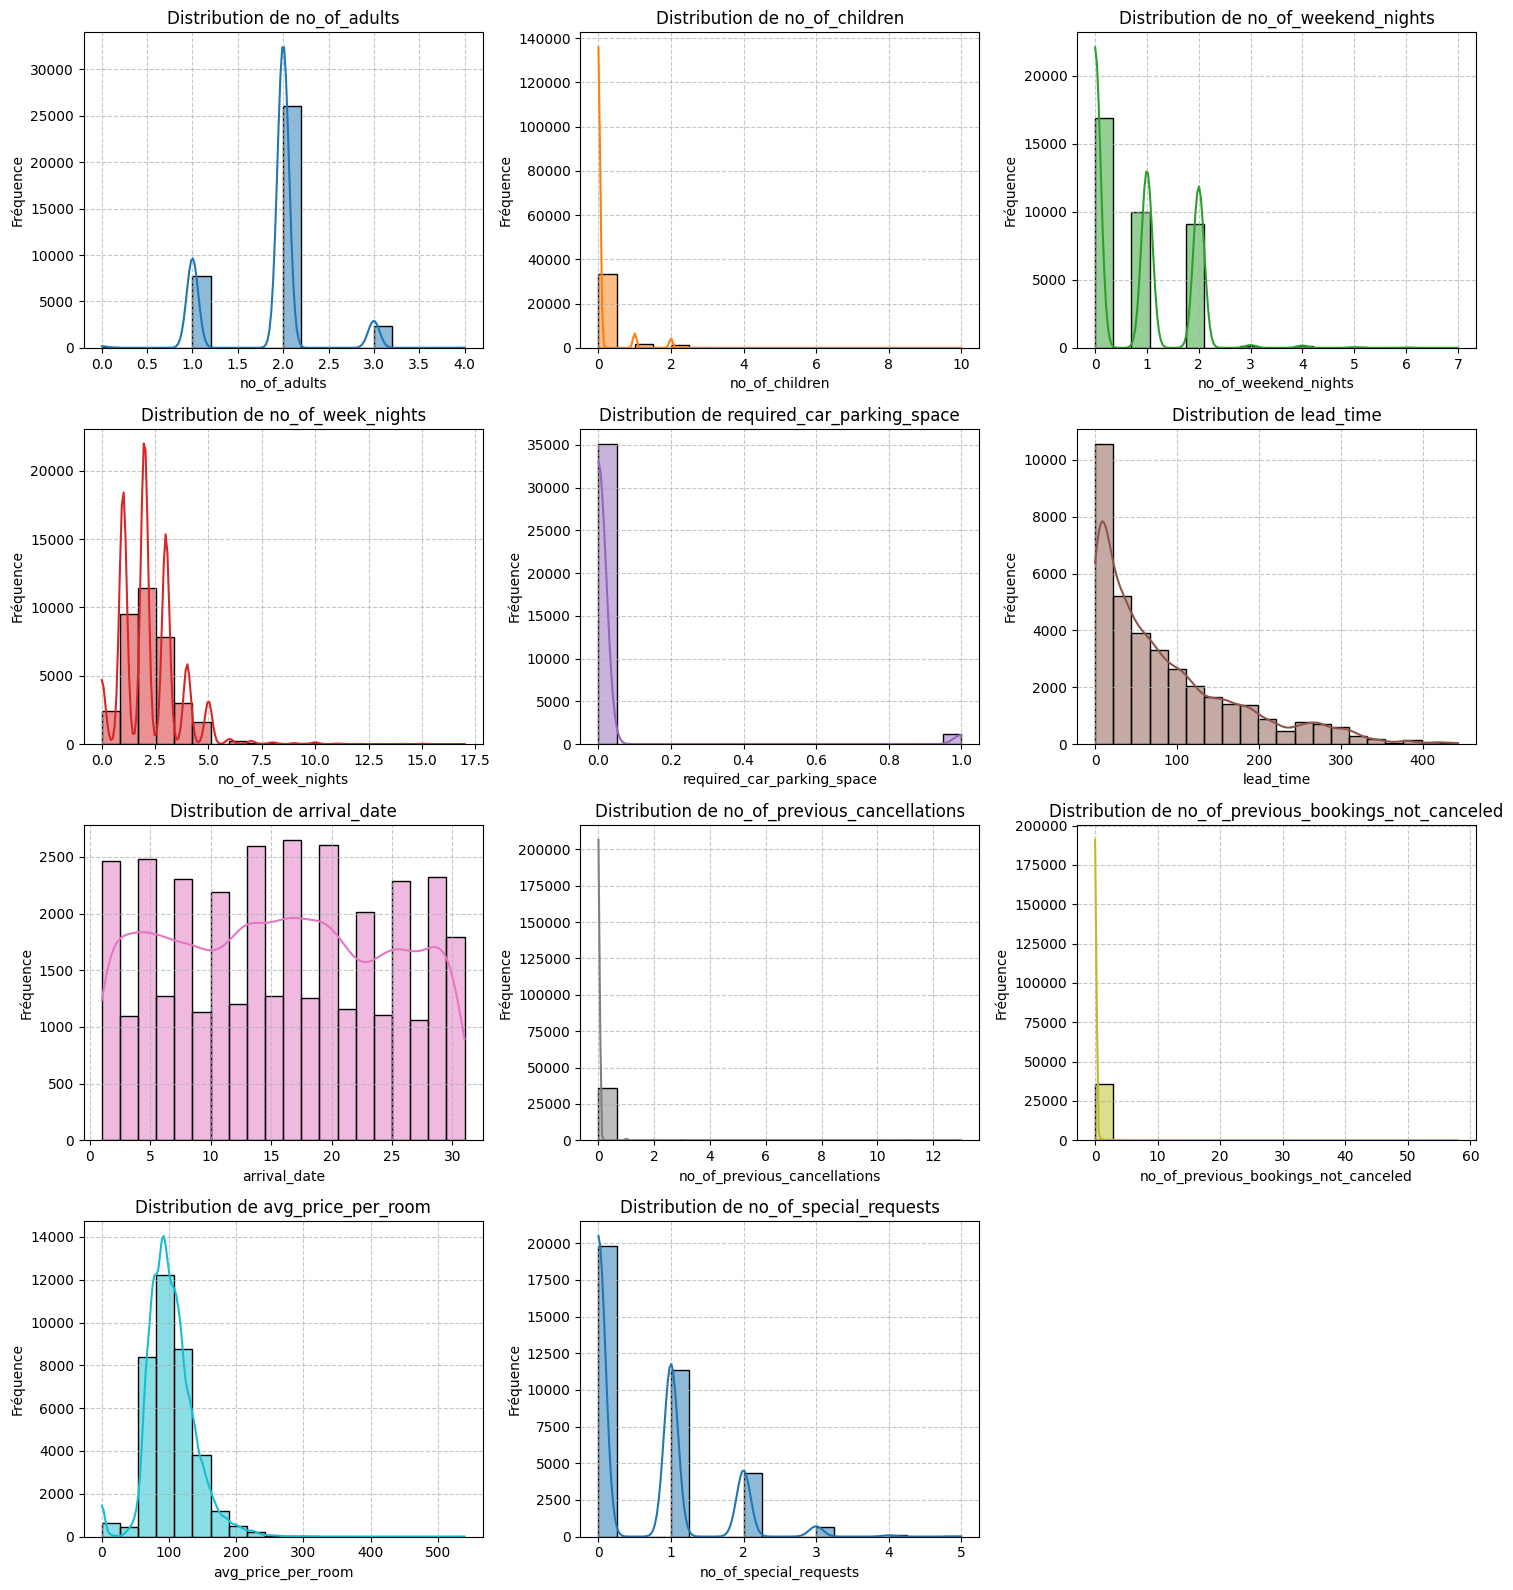

In [10]:
colors = sns.color_palette('tab10', n_colors=len(var_num))
n_cols = 3
n_rows = math.ceil(len(var_num) / n_cols)
plt.figure(figsize=(5 * n_cols, 4 * n_rows)) 

for i, col in enumerate(var_num):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col].dropna(), kde=True, bins=20, color=colors[i]) 
    plt.title(f'Distribution de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Fréquence', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    
plt.tight_layout()
plt.show()

In [11]:
filtre_lead_time = df[df['lead_time'] > 365]
filtre_price = df[df['avg_price_per_room'] > 120]
print(f"Nombre d'observations avec lead_time > 126 : {filtre_lead_time.shape[0]}")
print(f"Nombre d'observations avec avg_price_per_room > 120 : {filtre_price.shape[0]}")

Nombre d'observations avec lead_time > 126 : 243
Nombre d'observations avec avg_price_per_room > 120 : 9058


In [12]:
df = df[df['lead_time'] < 365]

#### 3.2.2. Statistiques descriptives des variables catégorielles

In [13]:
var_cat = df.select_dtypes(include='object').drop(['Booking_ID','booking_status'], axis=1).columns
print("\nRésumé des statistiques pour les colonnes catégorielles :")
display(df[var_cat].describe().T)


Résumé des statistiques pour les colonnes catégorielles :


,count,unique,top,freq
type_of_meal_plan,36032,4,Meal Plan 1,27765
room_type_reserved,36032,7,Room_Type 1,27889
arrival_year,36032,2,2018,29518
arrival_month,36032,12,10,5179
market_segment_type,36032,5,Online,23153
repeated_guest,36032,2,0,35102


#### Visualisations Graphiques

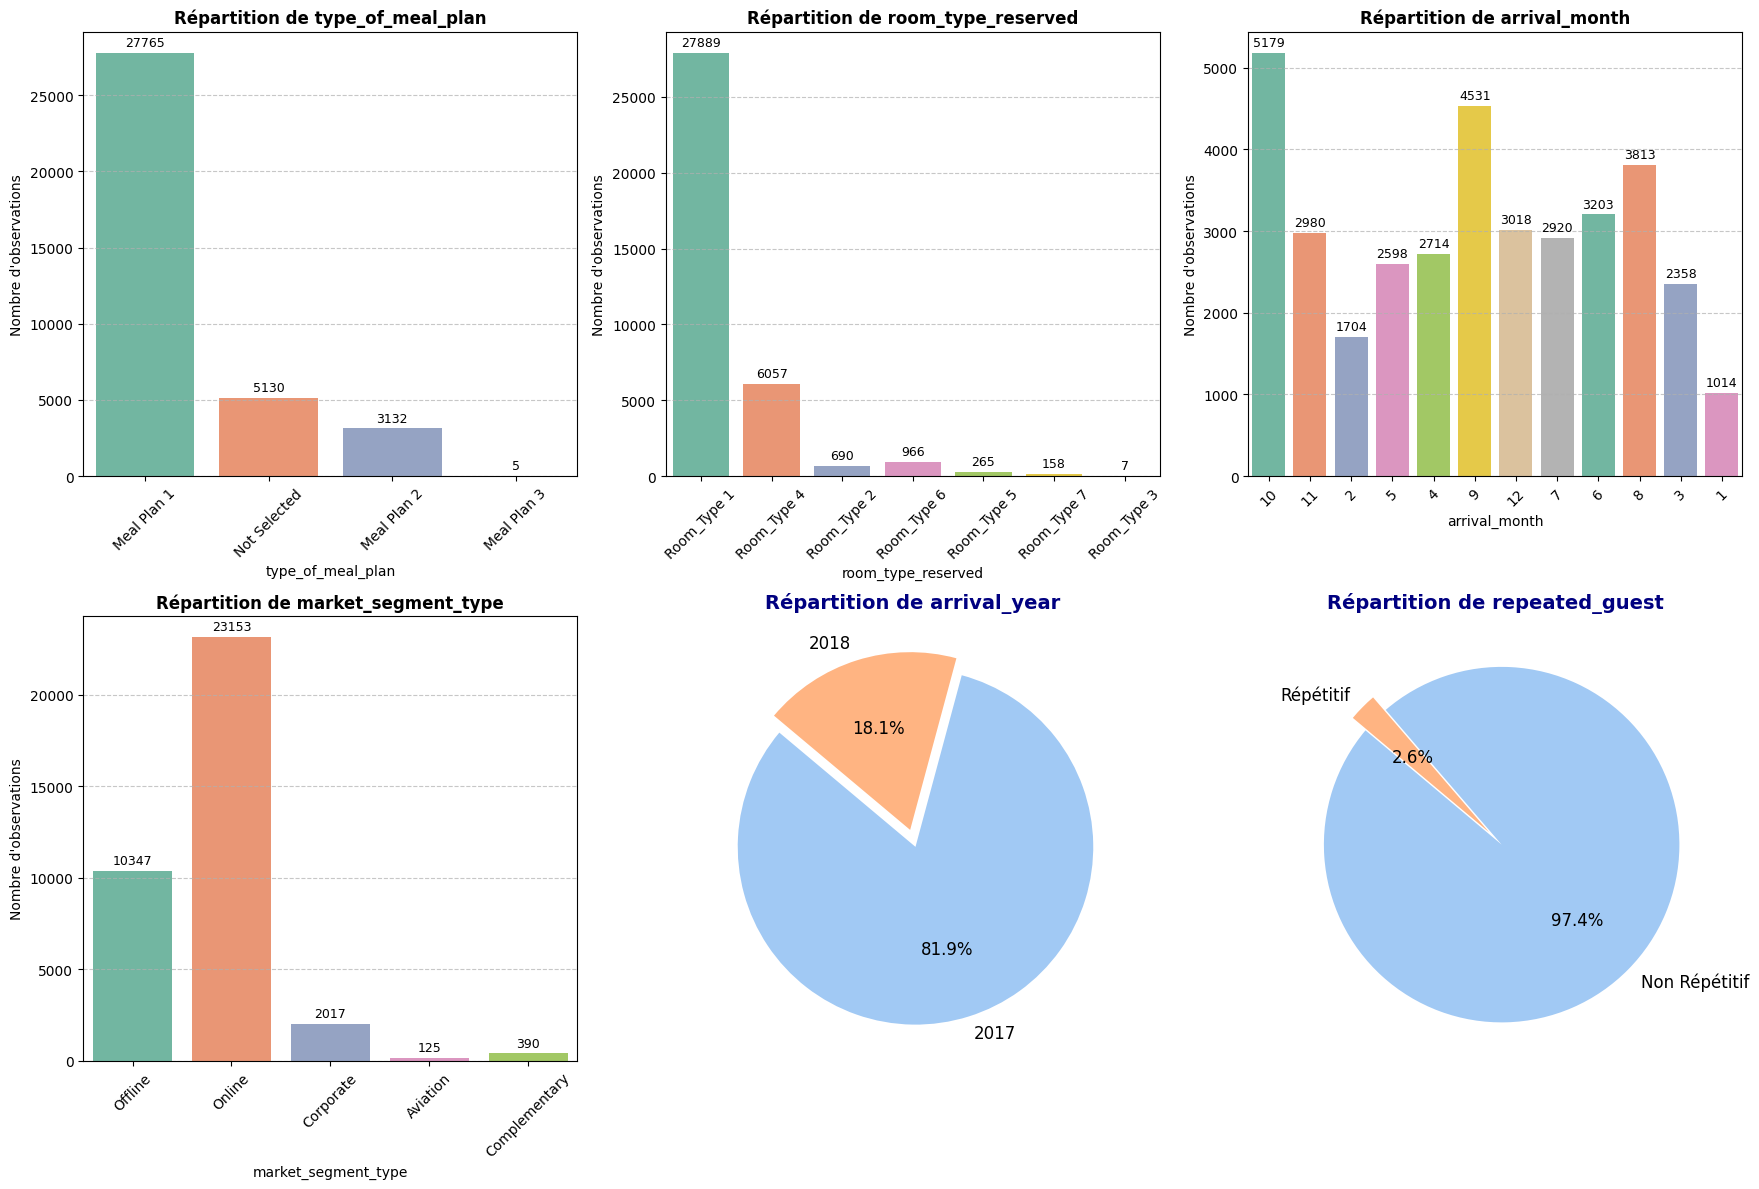

In [14]:
var_bin = [col for col in var_cat if df[col].nunique() == 2]  
var_multi = [col for col in var_cat if df[col].nunique() > 2]  
var_bin = [col for col in var_cat if df[col].nunique() == 2]  
var_multi = [col for col in var_cat if df[col].nunique() > 2] 

all_vars = var_multi + var_bin
num_vars = len(all_vars)
cols = min(3, num_vars)  
rows = math.ceil(num_vars / cols) 
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 6)) 
axes = np.ravel(axes) 

for i, col in enumerate(all_vars):
    ax = axes[i]
    if col in var_multi:
        sns.countplot(x=df[col], palette="Set2", ax=ax)
        ax.set_title(f'Répartition de {col}', fontsize=12, fontweight='bold')
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Nombre d\'observations', fontsize=10)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='baseline', fontsize=9, color='black', 
                        xytext=(0, 5), textcoords='offset points')
    else:
        labels = [str(i) for i in df[col].unique()]
        if col == 'repeated_guest':
            labels = ["Non Répétitif", "Répétitif"]
        elif col == 'booking_status':
            labels = ["Non Réservé", "Réservé"]

        counts = df[col].value_counts()
        ax.pie(counts, 
               labels=labels, 
               autopct='%1.1f%%', 
               startangle=140, 
               colors=sns.color_palette("pastel"), 
               explode=[0.05] * len(counts), 
               textprops={'fontsize': 12})
        ax.set_title(f'Répartition de {col}', fontsize=14, fontweight='bold', color='navy')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

### 3.3. Statistiques descriptives bivariées

#### 3.3.1. Analyse de la Relation entre les variables explicatives numériques et l'Annulation de Réservation (is_canceled)

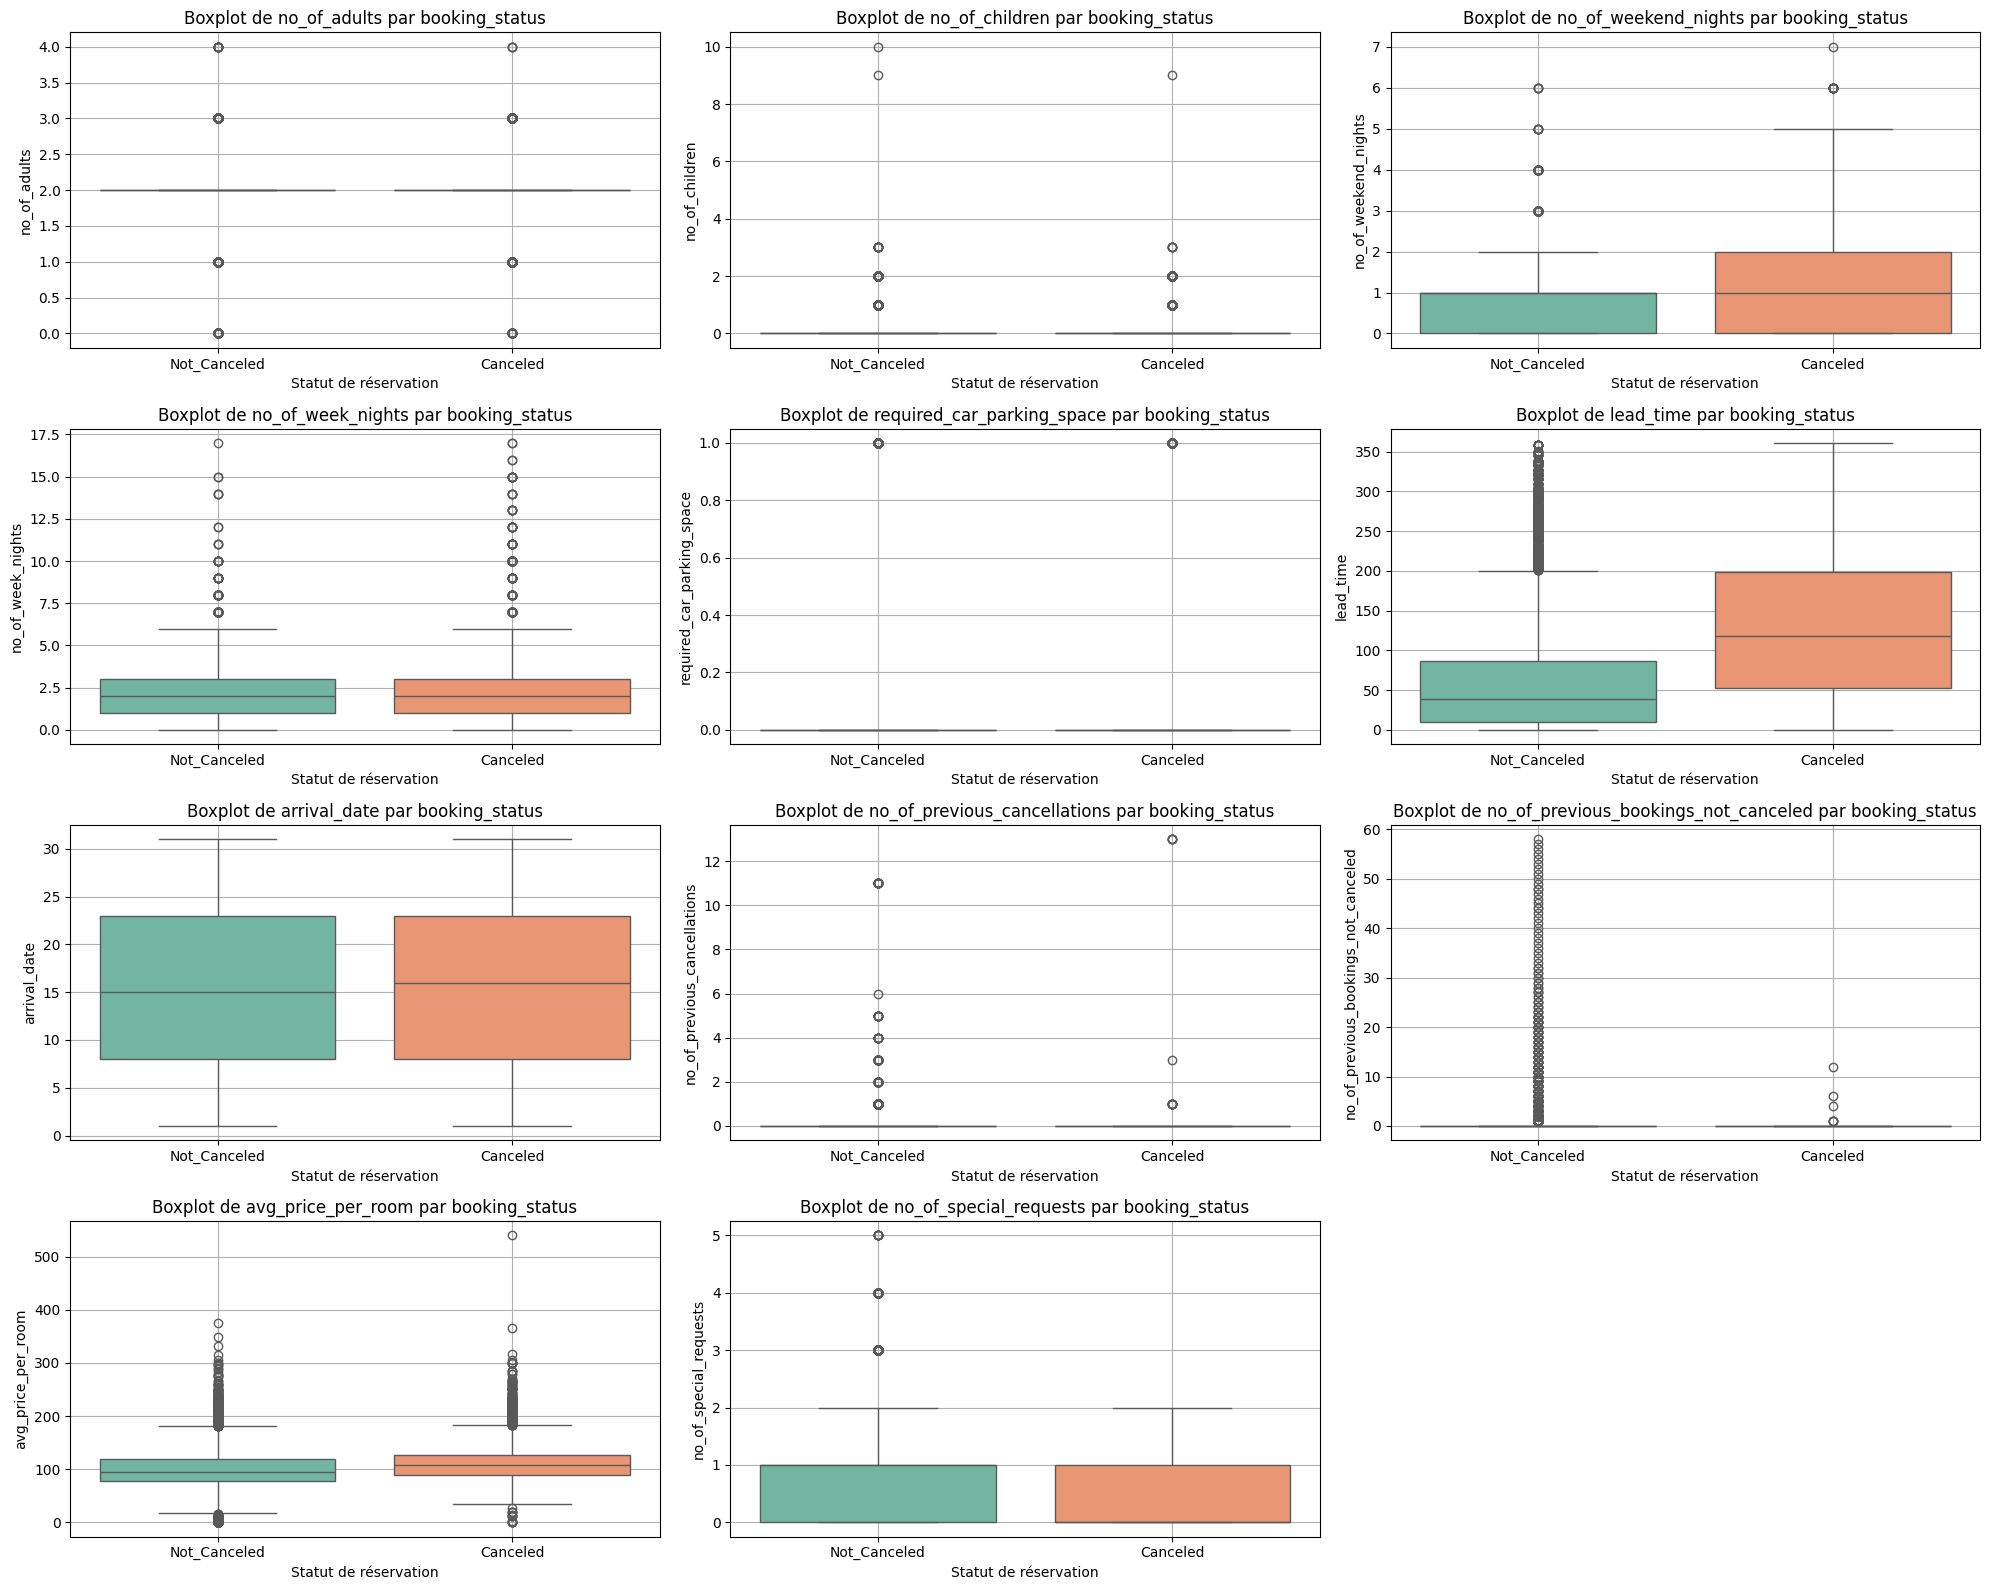

In [15]:
plt.figure(figsize=(20, 16))
plot_index = 1

for col in var_num:
    plt.subplot((len(var_num) - 1 + 2) // 3, 3, plot_index)  
    sns.boxplot(x=df['booking_status'], y=df[col], palette="Set2")
    plt.title(f'Boxplot de {col} par booking_status')
    plt.xlabel('Statut de réservation')
    plt.ylabel(col)
    plt.grid(True)
    plot_index += 1

plt.tight_layout()
plt.show()

#### 3.3.2. Matrice de corrélation entre les variables explicatives numériques : 

In [16]:
df_numeric = df.select_dtypes(include=[np.number]) 
corr_matrix = df_numeric.corr()
print("Matrice de Corrélation des Variables Numériques :")
pd.set_option("display.float_format", "{:.2f}".format)  
display(corr_matrix)

Matrice de Corrélation des Variables Numériques :


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.00,-0.02,0.10,0.11,0.01,0.10,0.03,-0.05,-0.12,0.30,0.19
no_of_children,-0.02,1.00,0.03,0.02,0.03,-0.04,0.03,-0.02,-0.02,0.34,0.12
no_of_weekend_nights,0.10,0.03,1.00,0.18,-0.03,0.05,0.02,-0.02,-0.03,-0.01,0.06
no_of_week_nights,0.11,0.02,0.18,1.00,-0.05,0.17,-0.01,-0.03,-0.05,0.02,0.05
required_car_parking_space,0.01,0.03,-0.03,-0.05,1.00,-0.07,0.00,0.03,0.06,0.06,0.09
lead_time,0.10,-0.04,0.05,0.17,-0.07,1.00,-0.01,-0.05,-0.08,-0.06,-0.10
arrival_date,0.03,0.03,0.02,-0.01,0.00,-0.01,1.00,-0.01,-0.00,0.02,0.02
no_of_previous_cancellations,-0.05,-0.02,-0.02,-0.03,0.03,-0.05,-0.01,1.00,0.47,-0.06,-0.00
no_of_previous_bookings_not_canceled,-0.12,-0.02,-0.03,-0.05,0.06,-0.08,-0.00,0.47,1.00,-0.11,0.03
avg_price_per_room,0.30,0.34,-0.01,0.02,0.06,-0.06,0.02,-0.06,-0.11,1.00,0.18


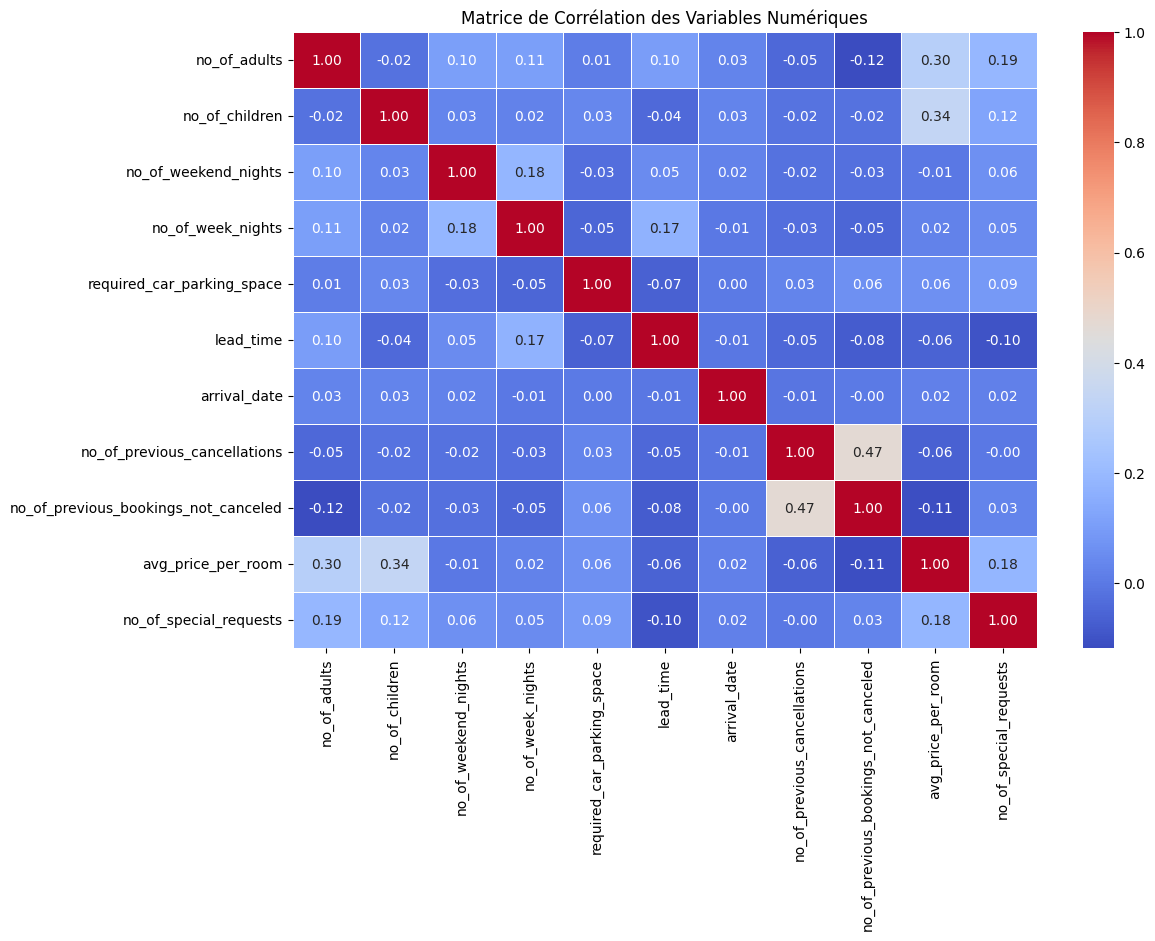

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation des Variables Numériques")
plt.show()

#### 3.3.3. Analyse de la Relation entre les variables explicatives Catégorielles et l'Annulation de Réservation (is_canceled)

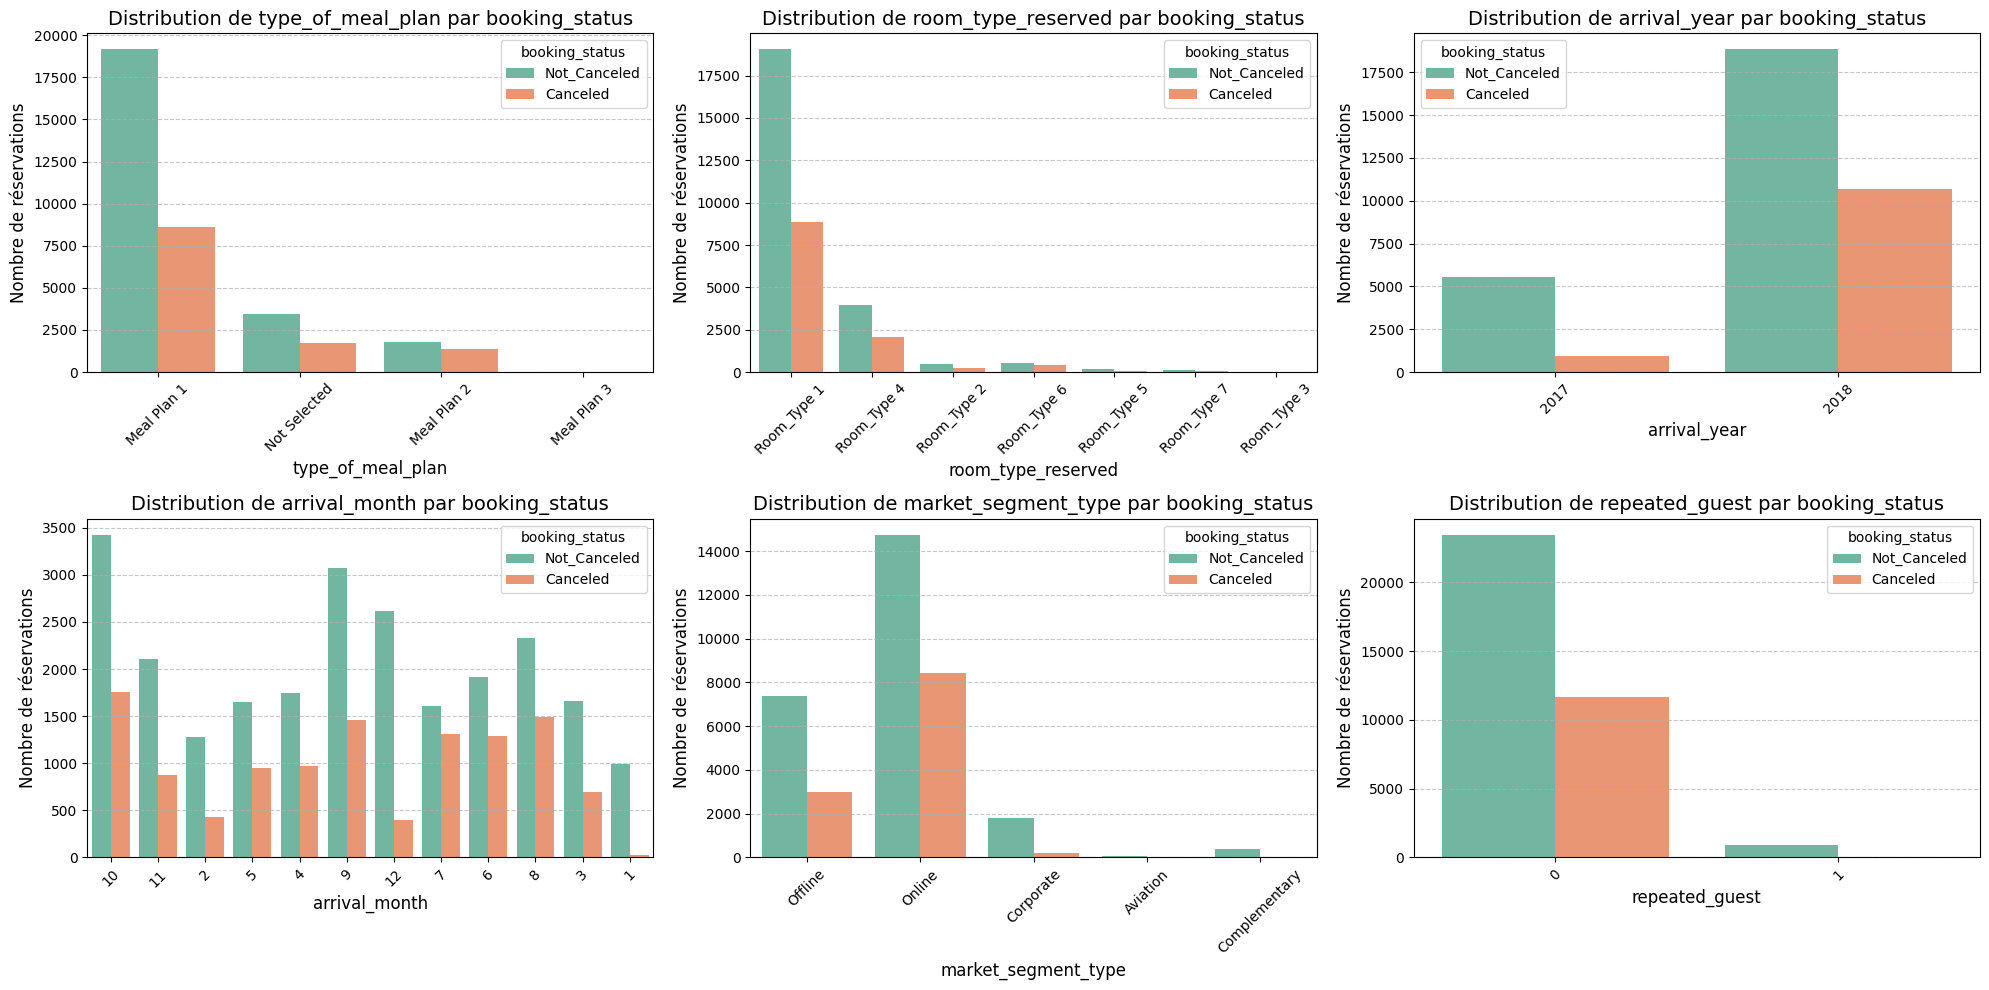

In [18]:
var_cat1 = df.select_dtypes(include='object').drop(['booking_status','Booking_ID'], axis=1).columns
plt.figure(figsize=(20, 10))
num_plots = len(var_cat1)
rows = math.ceil(num_plots / 3)  
cols = min(num_plots, 3) 

for plot_index, col in enumerate(var_cat1, 1): 
    plt.subplot(rows, cols, plot_index) 
    sns.countplot(x=df[col], hue=df['booking_status'], palette="Set2")
    plt.title(f'Distribution de {col} par booking_status', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Nombre de réservations', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3.3.4 . Test de khi-deux d'indépendance entre les variables explicatives catégorielles et l'Annulation de Réservation (is_canceled)

In [19]:
resultats_test = []
var_cat1 = df.select_dtypes(include='object').drop(['booking_status','Booking_ID'], axis=1).columns
valeurs_p = [] 

for col in var_cat1:
    statistique_chi2, p_valeur, degres_liberté, valeurs_attendues = chi2_contingency(pd.crosstab(df['booking_status'], df[col]))
    valeurs_p.append(p_valeur)  
    if p_valeur < 0.05:
        resultats_test.append('Rejeter l\'hypothèse nulle') 
    else:
        resultats_test.append('Ne pas rejeter l\'hypothèse nulle') 
resume_test_chi2 = pd.DataFrame({'Variable catégorielle': var_cat1, 'Résultat du Test': resultats_test, 'P-value': valeurs_p})
display(resume_test_chi2)

,Variable catégorielle,Résultat du Test,P-value
0,type_of_meal_plan,Rejeter l'hypothèse nulle,0.00
1,room_type_reserved,Rejeter l'hypothèse nulle,0.00
2,arrival_year,Rejeter l'hypothèse nulle,0.00
3,arrival_month,Rejeter l'hypothèse nulle,0.00
4,market_segment_type,Rejeter l'hypothèse nulle,0.00
5,repeated_guest,Rejeter l'hypothèse nulle,0.00


## 4.Preprocessing <a id="preprocessing"></a>

In [20]:
X_features = df.drop(['booking_status', 'Booking_ID'], axis=1)
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 1, 'Canceled': 0})
y_target = df['booking_status']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.25, random_state=42, stratify=y_target) 
print("Dimensions de l'ensemble d'entraînement : ", X_train.shape)
display(X_train.head())
print("Dimensions de l'ensemble de test : ", X_test.shape)
display(X_test.head())

Dimensions de l'ensemble d'entraînement :  (27024, 17)


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
6870,2,0,2,3,Meal Plan 1,0,Room_Type 1,5,2018,12,30,Online,0,0,0,116.00,1
473,2,0,2,3,Meal Plan 1,0,Room_Type 1,268,2018,4,8,Offline,0,0,0,78.00,0
810,2,0,1,3,Not Selected,0,Room_Type 1,5,2018,7,14,Online,0,0,0,139.00,1
28721,2,0,0,1,Meal Plan 1,0,Room_Type 1,41,2018,12,27,Offline,0,0,0,65.00,1
25813,3,0,2,5,Meal Plan 1,0,Room_Type 4,187,2018,7,11,Online,0,0,0,134.45,2


Dimensions de l'ensemble de test :  (9008, 17)


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
16908,2,0,0,2,Meal Plan 1,0,Room_Type 1,71,2017,9,18,Online,0,0,0,89.25,1
4492,2,0,0,2,Meal Plan 1,0,Room_Type 1,79,2017,11,13,Offline,0,0,0,75.00,0
16293,2,0,0,4,Meal Plan 1,0,Room_Type 1,323,2018,5,17,Offline,0,0,0,70.00,0
31997,2,0,0,1,Meal Plan 1,0,Room_Type 1,11,2018,5,7,Online,0,0,0,141.00,0
26602,2,0,2,3,Meal Plan 2,0,Room_Type 1,137,2018,12,24,Online,0,0,0,146.10,2


In [22]:
num_cols_train = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols_train = X_train.select_dtypes(include='object').columns.tolist()

num_cols_test = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols_test = X_test.select_dtypes(include='object').columns.tolist()

print("Numerical Features (Train):", num_cols_train)
print("Categorical Features (Train):", cat_cols_train)
print("\nNumerical Features (Test):", num_cols_test)
print("Categorical Features (Test):", cat_cols_test)

Numerical Features (Train): ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
Categorical Features (Train): ['type_of_meal_plan', 'room_type_reserved', 'arrival_year', 'arrival_month', 'market_segment_type', 'repeated_guest']

Numerical Features (Test): ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
Categorical Features (Test): ['type_of_meal_plan', 'room_type_reserved', 'arrival_year', 'arrival_month', 'market_segment_type', 'repeated_guest']


In [23]:
num_scaler = RobustScaler()
cat_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)  

X_train[num_cols_train] = num_scaler.fit_transform(X_train[num_cols_train])
X_train[cat_cols_train] = cat_encoder.fit_transform(X_train[cat_cols_train])

print("Données d'entraînement après prétraitement :")
display(X_train.head())

X_test[num_cols_test] = num_scaler.transform(X_test[num_cols_test])
X_test[cat_cols_test] = cat_encoder.transform(X_test[cat_cols_test])

print("Données de test après prétraitement :")
display(X_test.head())

Données d'entraînement après prétraitement :


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
6870,0.00,0.00,0.50,0.50,0.00,0.00,0.00,-0.48,1.00,3.00,0.93,4.00,0.00,0.00,0.00,0.41,1.00
473,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.98,1.00,6.00,-0.53,3.00,0.00,0.00,0.00,-0.53,0.00
810,0.00,0.00,0.00,0.50,3.00,0.00,0.00,-0.48,1.00,9.00,-0.13,4.00,0.00,0.00,0.00,0.98,1.00
28721,0.00,0.00,-0.50,-0.50,0.00,0.00,0.00,-0.14,1.00,3.00,0.73,3.00,0.00,0.00,0.00,-0.85,1.00
25813,1.00,0.00,0.50,1.50,0.00,0.00,3.00,1.22,1.00,9.00,-0.33,4.00,0.00,0.00,0.00,0.87,2.00


Données de test après prétraitement :


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
16908,0.00,0.00,-0.50,0.00,0.00,0.00,0.00,0.14,0.00,11.00,0.13,4.00,0.00,0.00,0.00,-0.25,1.00
4492,0.00,0.00,-0.50,0.00,0.00,0.00,0.00,0.21,0.00,2.00,-0.20,3.00,0.00,0.00,0.00,-0.61,0.00
16293,0.00,0.00,-0.50,1.00,0.00,0.00,0.00,2.50,1.00,7.00,0.07,3.00,0.00,0.00,0.00,-0.73,0.00
31997,0.00,0.00,-0.50,-0.50,0.00,0.00,0.00,-0.42,1.00,7.00,-0.60,4.00,0.00,0.00,0.00,1.03,0.00
26602,0.00,0.00,0.50,0.50,1.00,0.00,0.00,0.76,1.00,3.00,0.53,4.00,0.00,0.00,0.00,1.16,2.00


### 4.1 Sélection de variables explicatives importantes (Lasso)

#### 4.1.1 Choisir meilleur hyperparamètre C

In [24]:
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  
gridsearch = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
gridsearch.fit(X_train, y_train)

print(f"Meilleur C (alpha): {gridsearch.best_params_['C']}")
print(f"Meilleure précision en validation croisée: {gridsearch.best_score_}")

Meilleur C (alpha): 10
Meilleure précision en validation croisée: 0.8048032190497189


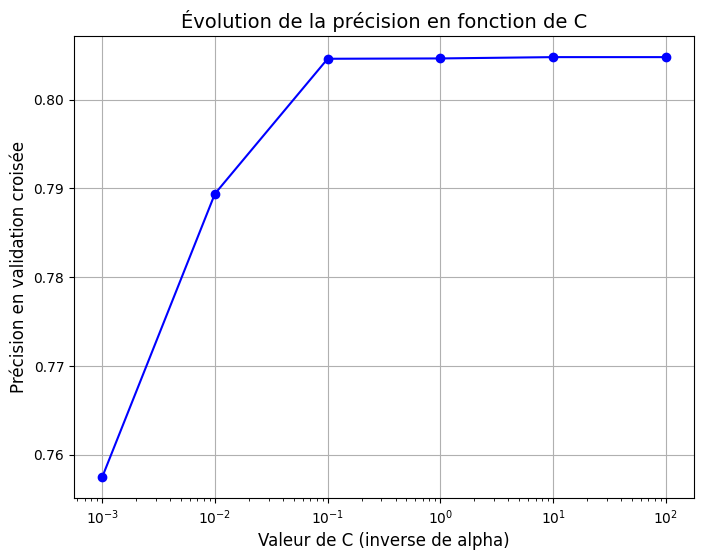

In [25]:
results = gridsearch.cv_results_
C_values = results['param_C'].data
mean_scores = results['mean_test_score']

plt.figure(figsize=(8, 6))
plt.plot(C_values, mean_scores, marker='o', linestyle='-', color='b')
plt.xscale('log') 
plt.xlabel('Valeur de C (inverse de alpha)', fontsize=12)
plt.ylabel('Précision en validation croisée', fontsize=12)
plt.title('Évolution de la précision en fonction de C', fontsize=14)
plt.grid(True)
plt.show()

#### 4.1.2 Sélectionner les variables importantes : Seuil = 0.03

In [26]:
best_model = gridsearch.best_estimator_
feature_importances = best_model.coef_[0]
print("Coefficients des caractéristiques :", feature_importances)

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print(feature_importance_df)

Coefficients des caractéristiques : [-3.60061991e-03  6.91173977e-03 -2.76984741e-01 -6.59374901e-02
 -7.20681271e-02  1.44877082e+00  8.58758874e-02 -1.46375093e+00
 -6.98346436e-01  3.89254874e-04 -5.59526580e-02 -1.16701309e+00
  1.86014931e+00 -1.87341216e-01  4.17700200e-02 -7.06796064e-01
  1.39418023e+00]
                                 Feature  Importance
0                           no_of_adults       -0.00
1                         no_of_children        0.01
2                   no_of_weekend_nights       -0.28
3                      no_of_week_nights       -0.07
4                      type_of_meal_plan       -0.07
5             required_car_parking_space        1.45
6                     room_type_reserved        0.09
7                              lead_time       -1.46
8                           arrival_year       -0.70
9                          arrival_month        0.00
10                          arrival_date       -0.06
11                   market_segment_type       -1.

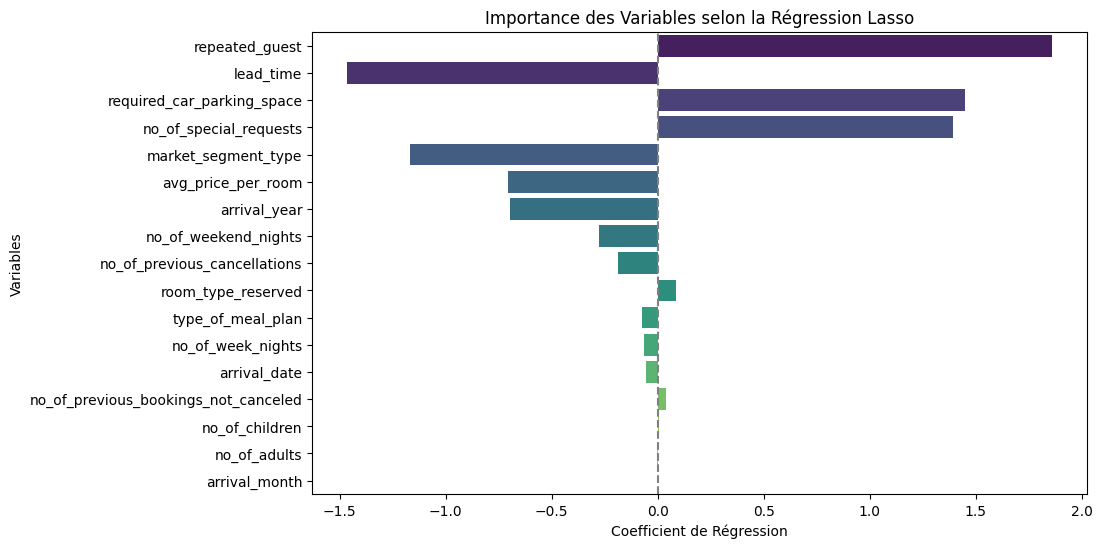

In [27]:
feature_importance_df["Abs_Importance"] = feature_importance_df["Importance"].abs()
feature_importance_df = feature_importance_df.sort_values(by="Abs_Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.xlabel("Coefficient de Régression")
plt.ylabel("Variables")
plt.title("Importance des Variables selon la Régression Lasso")
plt.axvline(x=0, color='gray', linestyle='dashed')
plt.show()

In [28]:
threshold = 0.03  
selected_features = feature_importance_df[abs(feature_importance_df['Importance']) > threshold]['Feature']
X_train = X_train[selected_features]
X_test = X_test[selected_features]
print("Nouvelles dimensions de X_train :", X_train.shape)
print("Nouvelles dimensions de X_test :", X_test.shape)

Nouvelles dimensions de X_train : (27024, 14)
Nouvelles dimensions de X_test : (9008, 14)


### Pipeline de Prétraitement et Évaluation d'un Modèle avec SMOTE et Validation Croisée

In [ ]:
def resample_data(X_train, y_train):
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resample, y_resample = smote.fit_resample(X_train, y_train)
    print("Avant SMOTE : ", Counter(y_train))
    print("Après SMOTE : ", Counter(y_resample))
    
    return X_resample, y_resample

In [30]:
def train_and_evaluate(model, X_train, y_train, metric):

    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring=metric, n_jobs=-1).mean()
    y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5, method="predict_proba")
    loss = log_loss(y_train, y_pred_cv[:, 1])

    print(f"===== Résultats de l'évaluation =====")
    print(f"Score de validation croisée ({metric}) : {cv_score:.4f}")
    print(f"Log Loss : {loss:.4f}")
    return cv_score, loss

In [31]:
def model_predict(model, model_name, X_train, y_train, X_test, y_test):
    
    train_errors, test_errors = [], [] 
    log_model.fit(X_train, y_train)
    y_train_pred_proba = log_model.predict_proba(X_train)
    y_test_pred_proba = log_model.predict_proba(X_test)
    train_errors.append(log_loss(y_train, y_train_pred_proba[:, 1]))
    test_errors.append(log_loss(y_test, y_test_pred_proba[:, 1]))

    model.fit(X_train, y_train)  
    y_train_pred_proba = model.predict_proba(X_train)
    y_test_pred_proba = model.predict_proba(X_test)
    train_errors.append(log_loss(y_train, y_train_pred_proba[:, 1]))
    test_errors.append(log_loss(y_test, y_test_pred_proba[:, 1]))
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"===== Rapport des métriques sur les données de test ===== : {accuracy:.2%}\n")

    loss = log_loss(y_test, y_test_pred_proba[:, 1])
    print(f"===== Perte sur les données de test ===== : {loss:.2f}\n")

    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"Évaluation du Modèle : {model_name}", fontsize=16, fontweight='bold') 

    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=["Non Annulé", "Annulé"], 
                yticklabels=["Non Annulé", "Annulé"], ax=ax[0])
    ax[0].set_title(f'Matrice de Confusion - {model_name}')
    ax[0].set_xlabel('Prédit')
    ax[0].set_ylabel('Réel')
    ax[1].plot(train_errors, label="Erreur sur l'entraînement", color="blue")
    ax[1].plot(test_errors, label="Erreur sur le test", color="red")
    ax[1].set_title(f"Erreur log_loss : {model_name}")
    ax[1].set_xlabel("Itérations")
    ax[1].set_ylabel("log_loss")
    ax[1].legend()

    plt.tight_layout()
    plt.show()

## 5. Initialisation des modèles <a id="modelisation"></a>

### 5.1 Régression logistique

Avant SMOTE :  Counter({1: 18284, 0: 8740})
Après SMOTE :  Counter({1: 18284, 0: 18284})
===== Résultats de l'évaluation =====
Score de validation croisée (precision) : 0.7723
Log Loss : 0.4769
===== Rapport des métriques sur les données de test ===== : 80.62%

===== Perte sur les données de test ===== : 0.44



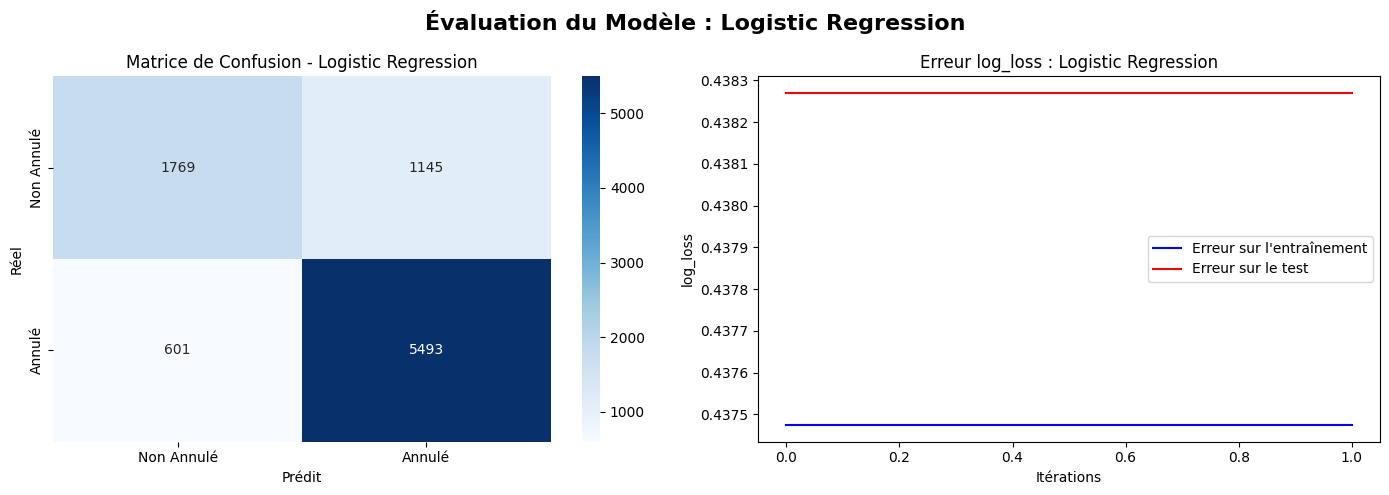

In [32]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
X_resample, y_resample = resample_data(X_train, y_train)
train_and_evaluate(log_model, X_resample, y_resample, metric='precision')
model_predict(log_model, "Logistic Regression", X_train, y_train, X_test, y_test)

### 5.2 Random forest

Avant SMOTE :  Counter({1: 18284, 0: 8740})
Après SMOTE :  Counter({1: 18284, 0: 18284})
===== Résultats de l'évaluation =====
Score de validation croisée (precision) : 0.9087
Log Loss : 0.2475
===== Rapport des métriques sur les données de test ===== : 90.03%

===== Perte sur les données de test ===== : 0.27



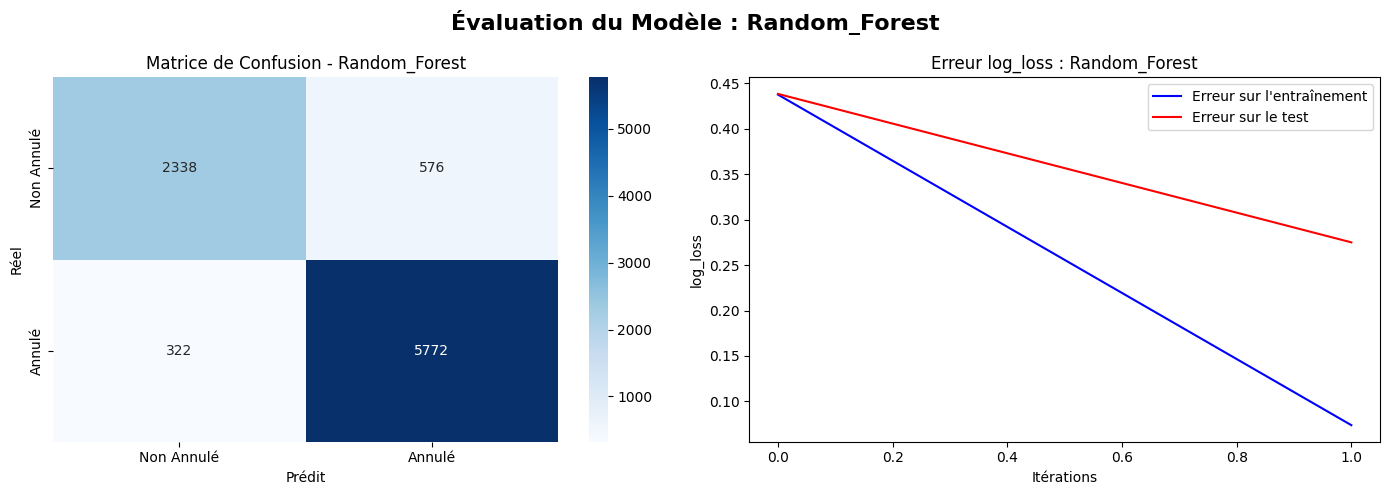

In [33]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
X_resample, y_resample = resample_data(X_train, y_train)
train_and_evaluate(rf_model, X_resample, y_resample, metric='precision')
model_predict(rf_model, "Random_Forest", X_train, y_train, X_test, y_test)

### 5.3 XGBoost

Avant SMOTE :  Counter({1: 18284, 0: 8740})
Après SMOTE :  Counter({1: 18284, 0: 18284})
===== Résultats de l'évaluation =====
Score de validation croisée (precision) : 0.8950
Log Loss : 0.2853
===== Rapport des métriques sur les données de test ===== : 88.61%

===== Perte sur les données de test ===== : 0.27



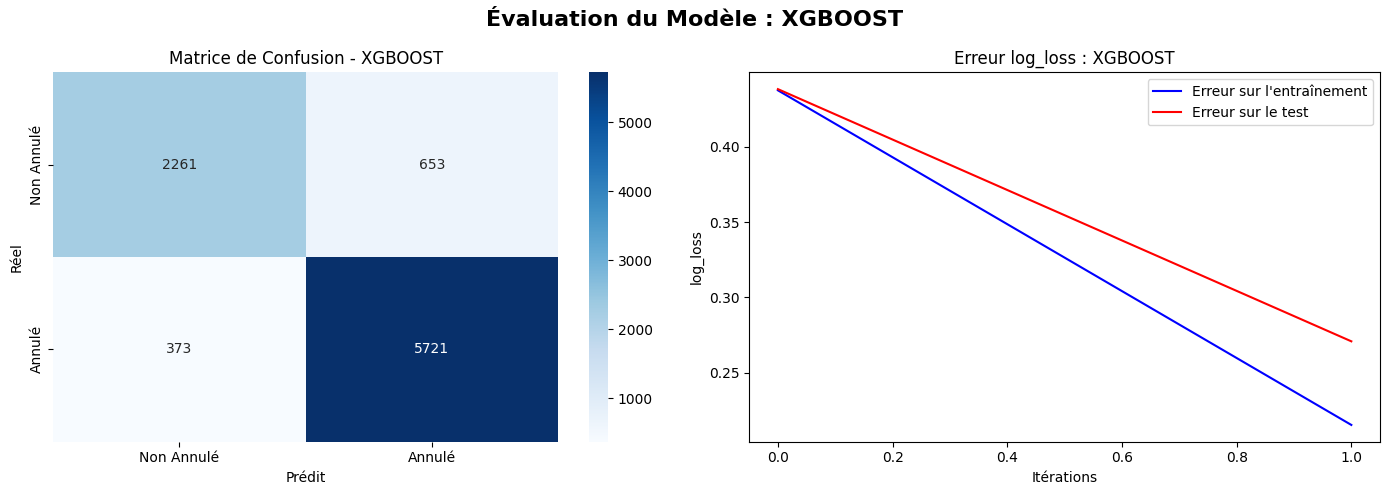

In [34]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
X_resample, y_resample = resample_data(X_train, y_train)
train_and_evaluate(xgb_model, X_train, y_train, metric='precision')
model_predict(xgb_model, "XGBOOST", X_train, y_train, X_test, y_test)

### 5.4 MLP

Avant SMOTE :  Counter({1: 18284, 0: 8740})
Après SMOTE :  Counter({1: 18284, 0: 18284})
===== Résultats de l'évaluation =====
Score de validation croisée (precision) : 0.8517
Log Loss : 0.3706
===== Rapport des métriques sur les données de test ===== : 85.12%

===== Perte sur les données de test ===== : 0.35



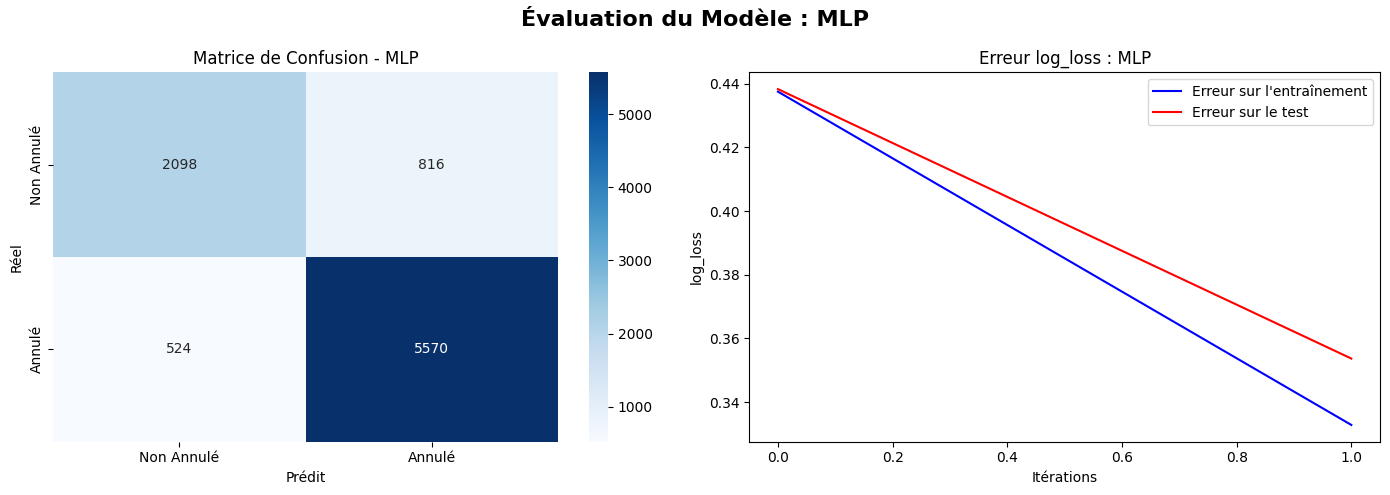

In [35]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(20,20), activation='relu', max_iter=700, random_state=42)
X_resample, y_resample = resample_data(X_train, y_train)
train_and_evaluate(mlp_classifier, X_resample, y_resample, metric='precision')
model_predict(mlp_classifier, "MLP", X_train, y_train, X_test, y_test)

## 6 Fine-tuning des hyperparamètres du modèle retenu <a id="finetuning"></a>

### 6.1. Fine-tuning pour RandomForestClassifier (Grid Search)

In [36]:
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]}

grid_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2)

grid_rf.fit(X_train, y_train)
print("Meilleurs hyperparamètres RandomForest :", grid_rf.best_params_)
best_rf_model = grid_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   8.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   9.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   9.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   4.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   9.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   9.1s
[CV] END max_depth=None, 

### 6.2 Fine-tuning pour XGBClassifier

In [37]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]}

grid_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2)

grid_xgb.fit(X_train, y_train)
print("Meilleurs hyperparamètres XGBoost :", grid_xgb.best_params_)
best_xgb_model = grid_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

### 6.3 Évaluation (commune aux deux modèles)

In [38]:
print("Accuracy RF:", accuracy_score(y_test, y_pred_rf))
print("Rapport de classification RF:\n", classification_report(y_test, y_pred_rf))
print("Matrice de confusion RF:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy RF: 0.8989786856127886
Rapport de classification RF:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      2914
           1       0.91      0.95      0.93      6094

    accuracy                           0.90      9008
   macro avg       0.89      0.87      0.88      9008
weighted avg       0.90      0.90      0.90      9008

Matrice de confusion RF:
 [[2317  597]
 [ 313 5781]]


In [39]:
print("Accuracy XGB:", accuracy_score(y_test, y_pred_xgb))
print("Rapport de classification XGB:\n", classification_report(y_test, y_pred_xgb))
print("Matrice de confusion XGB:\n", confusion_matrix(y_test, y_pred_xgb))

Accuracy XGB: 0.8967584369449378
Rapport de classification XGB:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      2914
           1       0.91      0.95      0.93      6094

    accuracy                           0.90      9008
   macro avg       0.89      0.87      0.88      9008
weighted avg       0.90      0.90      0.90      9008

Matrice de confusion XGB:
 [[2319  595]
 [ 335 5759]]
